In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

In [2]:
data_folder = "processed"
ers_data = pd.read_csv(f"{data_folder}/combined.csv")

In [3]:
ers_data.describe()

,Melding ID,Varighet,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Bredde,...,Lange,Lyr,Lysing,Sei,Snabeluer,Torsk,Uer (vanlig),Rundvekt,ANDRE,Bruttotonnasje
count,4.837330e+05,483733.000000,483733.000000,483733.000000,483733.000000,483733.000000,483733.000000,483733.000000,4.837330e+05,483663.000000,...,483733.000000,483733.000000,483733.000000,483733.000000,483733.000000,483733.000000,483733.000000,4.837330e+05,4.837330e+05,483733.000000
mean,1.409734e+06,293.276961,68.716376,16.092276,-227.493578,68.727550,16.118589,-230.386608,1.649109e+04,12.658638,...,21.759609,9.787195,38.736090,2148.654872,405.162683,3271.328167,122.385206,8.914385e+03,9.854216e+02,1951.524047
std,9.335555e+05,155.872103,6.469057,13.155708,137.564399,6.485147,13.158709,141.851253,5.854672e+04,2.845014,...,86.178660,95.963907,269.313901,4621.726735,2407.676208,5739.533628,904.078921,1.103960e+04,8.921787e+03,1223.702951
min,3.756500e+04,0.000000,46.372000,-58.017000,-3243.000000,-71.605000,-79.867000,-5275.000000,0.000000e+00,4.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.523910e+05,196.000000,62.007000,5.665000,-282.000000,62.017000,5.667000,-285.000000,5.820000e+03,10.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.628000e+03,0.000000e+00,840.000000
50%,1.294586e+06,288.000000,70.939000,17.121000,-216.000000,70.970000,17.105000,-218.000000,1.240500e+04,13.000000,...,0.000000,0.000000,0.000000,36.000000,0.000000,292.000000,0.000000,6.412000e+03,0.000000e+00,1853.000000
75%,2.212921e+06,352.000000,74.123000,23.664000,-153.000000,74.131000,23.688000,-153.000000,2.432900e+04,15.400000,...,0.000000,0.000000,0.000000,2100.000000,0.000000,4247.000000,0.000000,1.220500e+04,0.000000e+00,3104.000000
max,3.302700e+06,9781.000000,81.336000,56.511000,540.000000,81.423000,174.833000,1616.000000,1.748981e+07,18.800000,...,4973.000000,15000.000000,25000.000000,86506.000000,82824.000000,90666.000000,69498.000000,1.810400e+06,1.810300e+06,4552.000000


In [4]:
ers_data.columns

Index(['Melding ID', 'Meldingstidspunkt', 'Starttidspunkt', 'Stopptidspunkt',
       'Radiokallesignal (ERS)', 'Varighet', 'Startposisjon bredde',
       'Startposisjon lengde', 'Havdybde start', 'Stopposisjon bredde',
       'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand',
       'Redskap FAO (kode)', 'Hovedart FAO', 'Bredde', 'Fartøylengde',
       'Hovedområde start', 'Hovedområde stopp', 'Blåkveite', 'Breiflabb',
       'Dypvannsreke', 'Flekksteinbit', 'Gråsteinbit', 'Hyse', 'Kveite',
       'Lange', 'Lyr', 'Lysing', 'Sei', 'Snabeluer', 'Torsk', 'Uer (vanlig)',
       'Rundvekt', 'ANDRE', 'Bruttotonnasje'],
      dtype='object')

[]

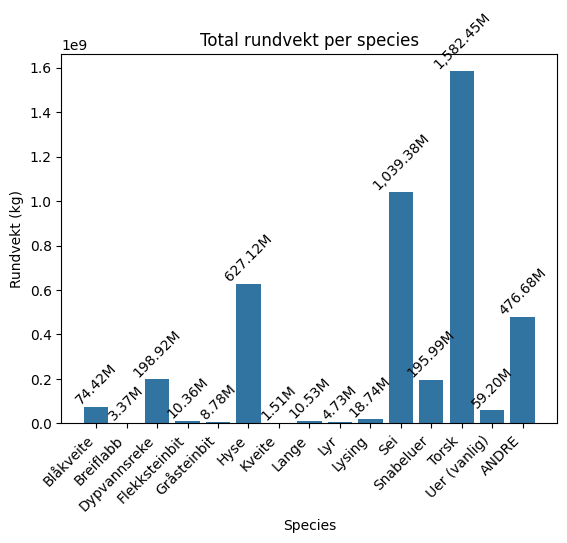

In [5]:
# Per species
species = ers_data[["Blåkveite", "Breiflabb", "Dypvannsreke", "Flekksteinbit", "Gråsteinbit",
                    "Hyse", "Kveite", "Lange", "Lyr", "Lysing", "Sei", "Snabeluer", "Torsk", "Uer (vanlig)", "ANDRE"]]
n_per_species = species.sum()

fig, ax = plt.subplots()    

fig = sb.barplot(n_per_species, ax=ax)
fig.set_xlabel("Species")
fig.set_ylabel("Rundvekt (kg)")
fig.set_title("Total rundvekt per species")
plt.xticks(rotation=45, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: '{:,.2f}'.format(x/1000000) + 'M', label_type='edge', rotation=45)
fig.plot()

[]

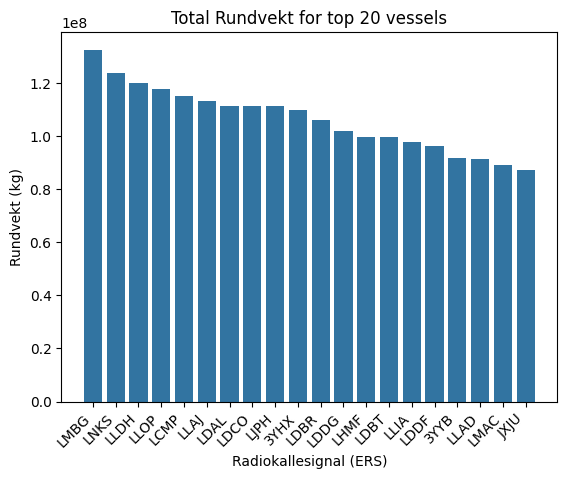

In [6]:
# top N vessels
group_by_vessel = ers_data.groupby("Radiokallesignal (ERS)").agg({"Rundvekt": "sum"})
N_vessels = 20
top_vessels = group_by_vessel.sort_values(by="Rundvekt", ascending=False).head(N_vessels)

fig, ax = plt.subplots()    
fig = sb.barplot(top_vessels, x="Radiokallesignal (ERS)", y="Rundvekt", ax=ax)
fig.set_ylabel("Rundvekt (kg)")
plt.xticks(rotation=45, ha="right")
fig.set_title(f"Total Rundvekt for top {N_vessels} vessels")
fig.plot()

[]

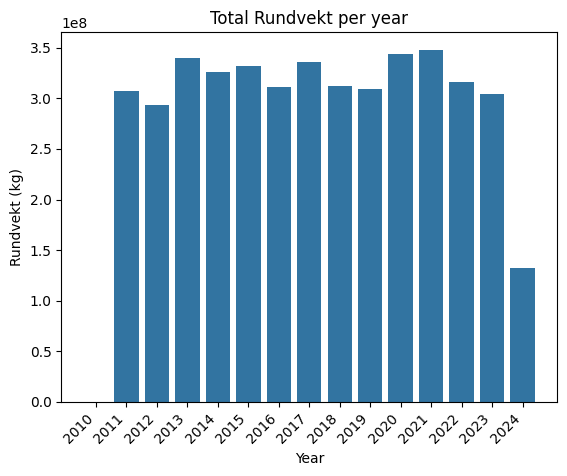

In [7]:
# Per year
ers_data["Starttidspunkt"] = pd.to_datetime(ers_data["Starttidspunkt"])
ers_data["Year"] = ers_data["Starttidspunkt"].dt.year
group_by_year = ers_data.groupby("Year").agg({"Rundvekt": "sum"})

fig, ax = plt.subplots()    
fig = sb.barplot(group_by_year, x="Year", y="Rundvekt", ax=ax)
fig.set_ylabel("Rundvekt (kg)")
plt.xticks(rotation=45, ha="right")
fig.set_title("Total Rundvekt per year")
fig.plot()

[]

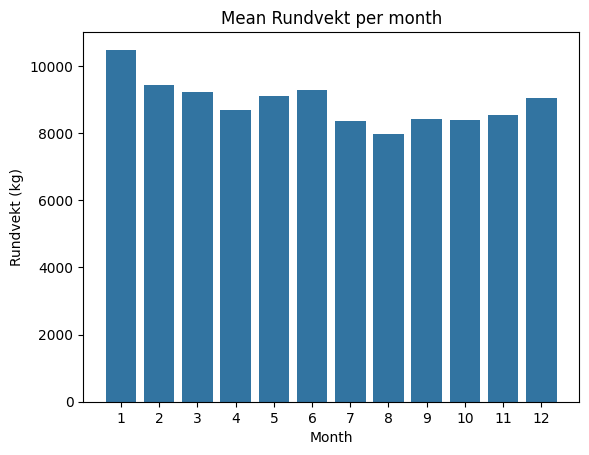

In [8]:
# Mean per month
ers_data["Starttidspunkt"] = pd.to_datetime(ers_data["Starttidspunkt"])
ers_data["Month"] = ers_data["Starttidspunkt"].dt.month
group_by_month = ers_data.groupby("Month").agg({"Rundvekt": "mean"})
group_by_month

fig, ax = plt.subplots()    

fig = sb.barplot(group_by_month, x="Month", y="Rundvekt", ax=ax)
fig.set_ylabel("Rundvekt (kg)")
fig.set_title("Mean Rundvekt per month")
fig.plot()

[]

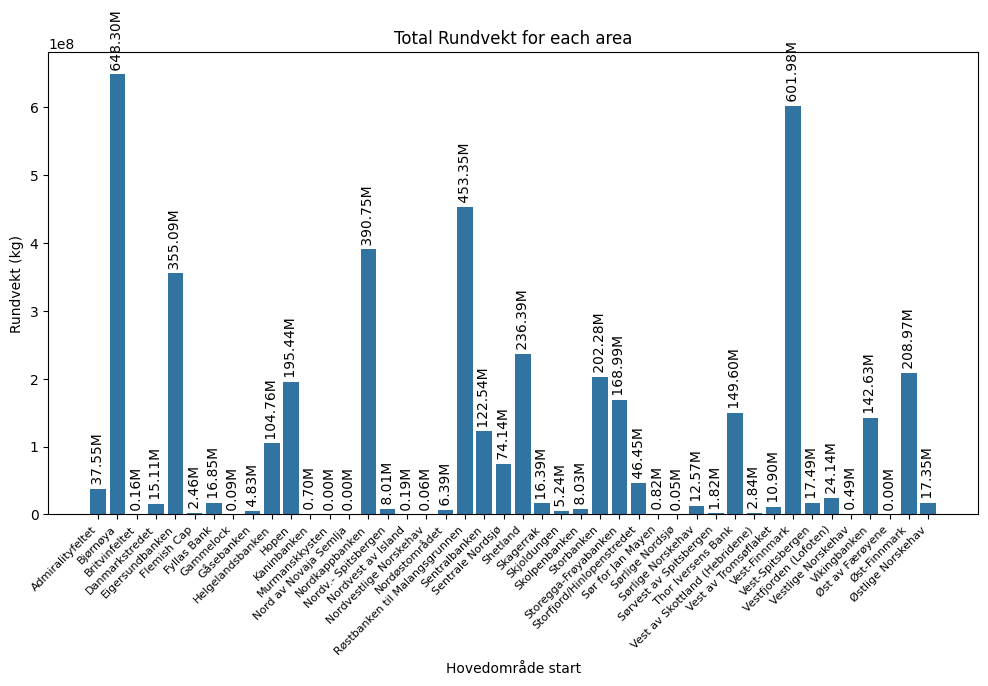

In [9]:
# Total per area
group_by_area = ers_data.groupby("Hovedområde start").agg({"Rundvekt": "sum"})
group_by_area

fig, ax = plt.subplots(figsize=(12,6))    

fig = sb.barplot(group_by_area, x="Hovedområde start", y="Rundvekt", ax=ax)
fig.set_ylabel("Rundvekt (kg)")
fig.set_title("Total Rundvekt for each area")
plt.xticks(rotation=45, ha="right", fontsize=8)
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: ' {:,.2f}'.format(x/1000000) + 'M', label_type='edge', rotation=90)
fig.plot()

[]

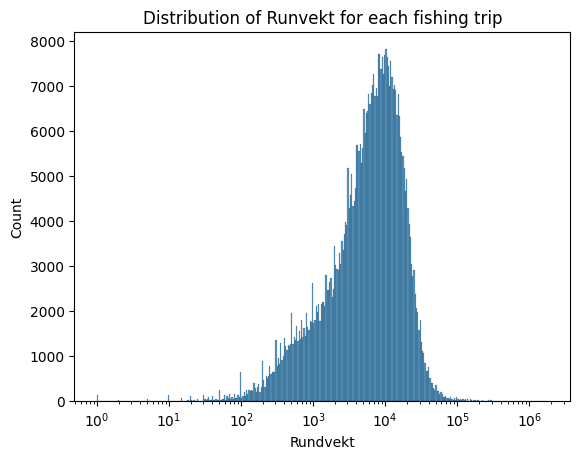

In [10]:
# Catch distribution
fig, ax = plt.subplots()
fig = sb.histplot(ers_data, x="Rundvekt", log_scale=True)
fig.set_title("Distribution of Runvekt for each fishing trip")
plt.plot()